**Задание 1**

In [4]:
# !pip install Bio
from Bio import Phylo
from Bio.Phylo.PhyloXML import Phylogeny
from difflib import SequenceMatcher
import random

Построение филогенетического дерева.

In [5]:
def phylogeny(phylo_tree):
    vertexes = list(phylo_tree.find_clades(terminal=False))
    for vertex in vertexes[::-1]:
        child = vertex.clades
        child_name = [child[i].name for i in range(2)]
        match = SequenceMatcher(None, *child_name).find_longest_match()
        substring = child_name[0][match.a:match.a + match.size]
        vertex.name = ''.join(child_name) if len(substring) == 0 else substring

    print('Филогенетическое дерево построено.')
    Phylo.draw(phylo_tree)
    return phylo_tree
    # phylo_tree_2 = Phylogeny.from_tree(tree)
    # Phylo.draw(phylo_tree_2)

Реализация алгоритма Фитча.

In [6]:
def fitch_algorithm(tree):
    vertexes = list(tree.find_clades(terminal=False))

    child_0 = vertexes[0].clades
    child_name_0 = [child_0[i].name for i in range(len(child_0))]
    match = SequenceMatcher(None, *child_name_0).find_longest_match()
    substring = child_name_0[0][match.a:match.a + match.size]
    vertexes[0].name = random.choice(vertexes[0].name) if len(substring) == 0 else random.choice(substring)

    for vertex in vertexes:
        child = vertex.clades
        child_name = [child[i].name for i in range(len(child))]
        for child_i, name_i in zip(child, child_name):
            match = SequenceMatcher(None, name_i, vertex.name).find_longest_match()
            substring = name_i[match.a]
            child_i.name = random.choice(name_i) if len(substring) == 0 else substring

    print('Реализован алгоритм Фитча.')
    Phylo.draw(tree)

Чтение правильной скобочной последовательности из `"newick"`-файла: `(((A, A), C), (C, G))`

In [7]:
Phylo.read('test.newick', 'newick')

Tree(rooted=False, weight=1.0)

Филогенетическое дерево построено.


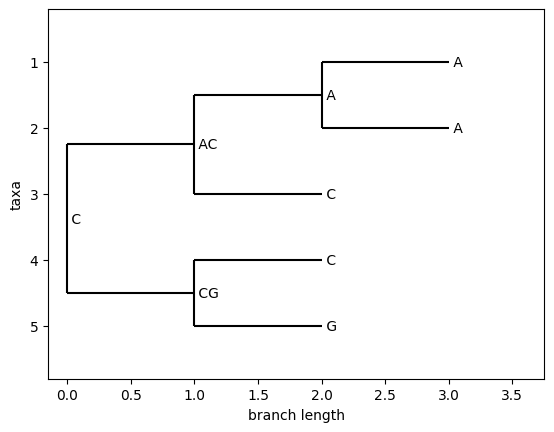

In [9]:
new_tree = phylogeny(Phylo.read('test.newick', 'newick'))

Реализован алгоритм Фитча.


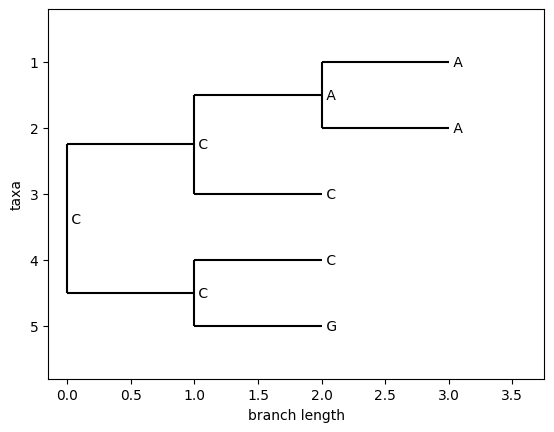

In [10]:
fitch_algorithm(new_tree)

**Задание 2**

*Напишите чему равно количество всех возможных не укоренненых филогенетических деревьев T(n) у которых n листьев.
А так же, чему равно количество укорененных.
Обратите внимание что это не числа Каталана.*

Найдём число неукоренённых филогенетических деревьев на $n$ листьях. Для этого нужно рассмотреть все возможные комбинации $n$ детей на двух родителях.

Считая, что минимум один ребёнок у каждой вершины, кроме листовой, есть, запишем комбинаторную формулу для поличества способов разделить n листьев на двоих детей:

для $m-$ количество листьев в одном из детей число способов разделить $n$ листьев равно сумме всех возможных комбинаций $\sum_{m=1}^{n-1}C_n^m$. 

Далее рекурсивно считаем для левого и правого поддерева. Тогда для подсчёта количества **неукоренённых** деревьев получим следующую формулу:

\begin{equation}
  T(n) = \sum_{m=1}^{n-1} \Bigl( C_n^m \cdot T(m) \cdot T(n-m) \Bigr).
\end{equation}

А для подсчёта **укоренённых** достаточно просто закрепить одну вершину $\Rightarrow$ глубина рекурсии уменьшится на единицу: 

\begin{equation}
  T_{root}(n) = T(n-1).
\end{equation}